In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
)

In [ ]:
read_file = pd.read_csv (r'wpbc.txt')
read_file.to_csv (r'breast-cancer-data.csv', index=None)

df = pd.read_csv('breast-cancer-data.csv')

In [ ]:
df.columns=['id','diagnosis','Time_to_recurrence', 'radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',
               'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave_points_mean',	'symmetry_mean',	'fractal_dimension_mean',
               'radius_se',	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave_points_se',
               'symmetry_se',	'fractal_dimension_se',	 'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',
               'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave_points_worst',	'symmetry_worst',	'fractal_dimension_worst', 'diameter', 'lymph_nodes']


df.head()


,id,diagnosis,Time_to_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diameter,lymph_nodes
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [ ]:
# Drop unnecessary columns
df.drop(columns=['id', 'Time_to_recurrence'], inplace=True)

# Encode Outcome
df['diagnosis'] = df['diagnosis'].map({'N': 0, 'R': 1})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diameter,lymph_nodes
0,0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
1,0,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
2,0,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
3,1,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0
4,1,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,...,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790,2.5,0


In [ ]:
# Convert missing values (?) in the lymph node feature (Feature_31) to NaN
df.replace("?", np.nan, inplace=True)

# Convert all feature columns to numeric
df = df.apply(pd.to_numeric)


print("Number of non-recurrent cases:", (df['diagnosis'] == 0).sum())
print("Number of recurrent cases:", (df['diagnosis'] == 1).sum())

df.head(10)

Number of non-recurrent cases: 150
Number of recurrent cases: 47


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diameter,lymph_nodes
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
1,0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.1188,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
2,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
4,1,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,...,107.30,733.2,0.1706,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
5,0,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,0.08910,0.1727,...,152.60,1593.0,0.1144,0.3371,0.2990,0.19220,0.2726,0.09581,1.5,NaN
6,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,4.0,10.0
7,0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,2.0,1.0
8,0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,6.0,20.0
9,0,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,2.0,0.0


In [ ]:
# Select training set: first 130 non-recurrent + first 37 recurrent + record #197
non_recurrent = df[df['diagnosis'] == 0].iloc[:130]
recurrent = df[df['diagnosis'] == 1].iloc[:37]
extra_record = df.iloc[196:197]  # Record #197 (Python indexing starts at 0)
train_set = pd.concat([non_recurrent, recurrent, extra_record])

# Replace missing values in train set using training median
median_lymph_nodes_train = train_set['lymph_nodes'].median()
# Use .loc to ensure setting the values properly
train_set.loc[train_set['lymph_nodes'].isna(), 'lymph_nodes'] = median_lymph_nodes_train

# Remaining data as test set
test_set = df.drop(train_set.index)

# Replace missing values in test set as well (using testing median)
median_lymph_nodes_test = test_set['lymph_nodes'].median()
test_set.loc[:, 'lymph_nodes'] = test_set['lymph_nodes'].fillna(median_lymph_nodes_test)

# Check if missing values are replaced
print(train_set['lymph_nodes'].isna().sum())
print(test_set['lymph_nodes'].isna().sum())

train_set.shape, test_set.shape


0
0


((168, 33), (29, 33))

In [ ]:
# Split features and labels
X_train, y_train = train_set.drop(columns=['diagnosis']), train_set['diagnosis']
X_test, y_test = test_set.drop(columns=['diagnosis']), test_set['diagnosis']

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Naïve Bayes classifier (GaussianNB)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions and probabilities
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

y_train_prob = nb_classifier.predict_proba(X_train)[:, 1]
y_test_prob = nb_classifier.predict_proba(X_test)[:, 1]


### TRAIN SET RESULTS ###
Confusion Matrix:
 [[96 35]
 [19 18]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       131
           1       0.34      0.49      0.40        37

    accuracy                           0.68       168
   macro avg       0.59      0.61      0.59       168
weighted avg       0.73      0.68      0.70       168

Accuracy: 0.6785714285714286
AUC: 0.6845471425624098

### TEST SET RESULTS ###
Confusion Matrix:
 [[12  7]
 [ 5  5]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.42      0.50      0.45        10

    accuracy                           0.59        29
   macro avg       0.56      0.57      0.56        29
weighted avg       0.61      0.59      0.59        29

Accuracy: 0.5862068965517241
AUC: 0.6000000000000001


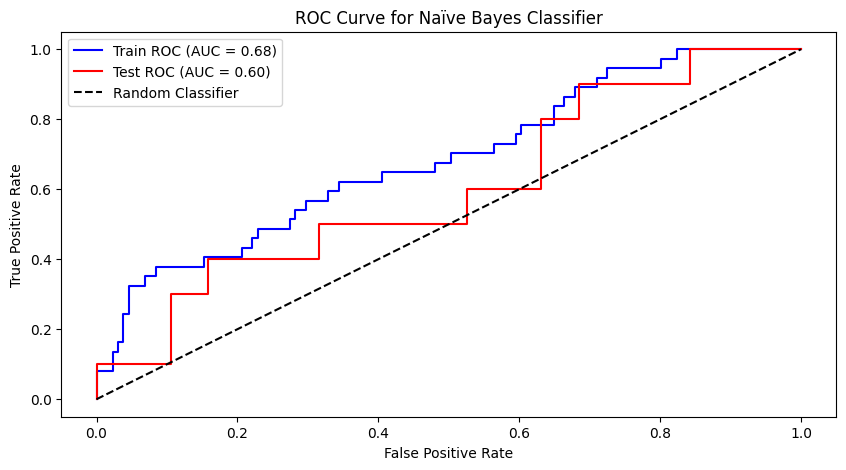

In [ ]:
# Compute confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Compute ROC and AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Print evaluation metrics
print("\n### TRAIN SET RESULTS ###")
print("Confusion Matrix:\n", train_cm)
print(classification_report(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("AUC:", auc_train)

print("\n### TEST SET RESULTS ###")
print("Confusion Matrix:\n", test_cm)
print(classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("AUC:", auc_test)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes Classifier')
plt.legend()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils import resample

In [ ]:
# Downsample the majority class (class 0) to 90 instances
majority_class = df[df['diagnosis'] == 0]
minority_class = df[df['diagnosis'] == 1]

majority_class_downsampled = resample(majority_class,
                                      replace=False,
                                      n_samples=90,
                                      random_state=42)

# Concatenate the downsampled majority class with the minority class
train_set_balanced = pd.concat([majority_class_downsampled, minority_class])

#Replace missing values with train_balanced median
median_train = train_set_balanced['lymph_nodes'].median()
# Use .loc to ensure setting the values properly
train_set_balanced.loc[train_set_balanced['lymph_nodes'].isna(), 'lymph_nodes'] = median_train

# Separate features and labels for the balanced dataset
X_train_balanced = train_set_balanced.drop(columns=['diagnosis'])
y_train_balanced = train_set_balanced['diagnosis']


# Apply SMOTE to upsample the minority class (class 1)
smote = SMOTE(sampling_strategy={1: 90}, k_neighbors=5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_balanced, y_train_balanced)

In [ ]:
# Train Naïve Bayes classifier (GaussianNB) on the resampled data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_res, y_train_res)

# Predictions and probabilities on original test set (not balanced)
y_train_pred = nb_classifier.predict(X_train_res)
y_test_pred = nb_classifier.predict(X_test)

y_train_prob = nb_classifier.predict_proba(X_train_res)[:, 1]
y_test_prob = nb_classifier.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


### TRAIN SET RESULTS ###
Confusion Matrix:
 [[68 22]
 [34 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        90
           1       0.72      0.62      0.67        90

    accuracy                           0.69       180
   macro avg       0.69      0.69      0.69       180
weighted avg       0.69      0.69      0.69       180

Accuracy: 0.6888888888888889
Precision: 0.717948717948718
Recall: 0.6222222222222222
F1 Score: 0.6666666666666666
AUC: 0.7675308641975309

### TEST SET RESULTS ###
Confusion Matrix:
 [[19  0]
 [10  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        19
           1       0.00      0.00      0.00        10

    accuracy                           0.66        29
   macro avg       0.33      0.50      0.40        29
weighted avg       0.43      0.66      0.52        29

Accuracy: 0.6551724137931034
Pr

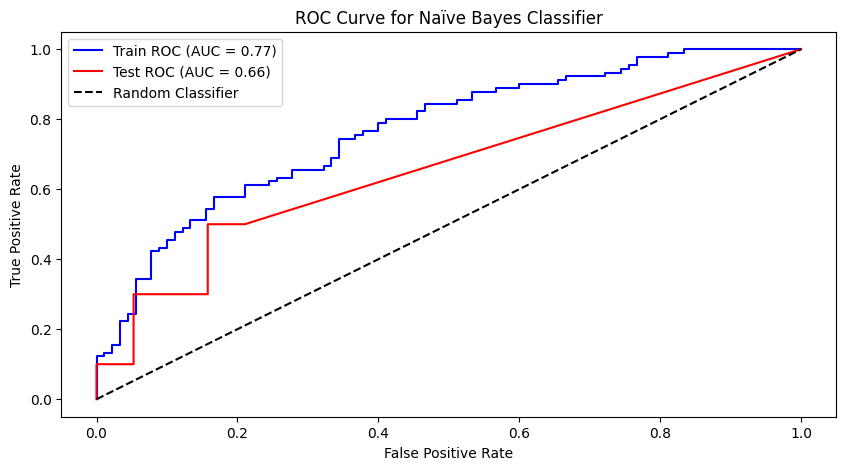

In [ ]:
# Compute confusion matrices
train_cm = confusion_matrix(y_train_res, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Compute ROC and AUC
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Compute precision, recall, and F1 score
precision_train = precision_score(y_train_res, y_train_pred)
recall_train = recall_score(y_train_res, y_train_pred)
f1_train = f1_score(y_train_res, y_train_pred)

precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("\n### TRAIN SET RESULTS ###")
print("Confusion Matrix:\n", train_cm)
print("Classification Report:\n", classification_report(y_train_res, y_train_pred))
print("Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("AUC:", auc_train)

print("\n### TEST SET RESULTS ###")
print("Confusion Matrix:\n", test_cm)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)
print("AUC:", auc_test)

# Plot ROC curves
plt.figure(figsize=(10, 5))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes Classifier')
plt.legend()
plt.show()

**SMOTE did not help in this scenario as it made the model better at recognizing the synthetic oversampled minority class but failing on actual unseen minority-class samples.
Alternative solutions like cost-sensitive learning, or hybrid approaches might be better for handling class imbalance while maintaining generalization.**